In [2]:
import numpy as np
import argparse
import cv2 as cv
import subprocess
import time
import os
from yolo_utils import infer_image, show_image

In [3]:
import pyttsx3
def speak(text):

    # INIT WILL INITIATE THE ENGINE(VARIABLE) FOR IT TO PERFORM THE FUNCTIONALITY:
    engine = pyttsx3.init()

    # GETTING AND SETTING UP THE VOICE GENDER:
    voices = engine.getProperty('voices')
    engine.setProperty('voice', voices[1].id)

    # GETTING AND SETTING UP THE RATE OF THE VOICE:
    rate = engine.getProperty('rate')
    engine.setProperty('rate', 175)

    # ALLOWS THE ENGINE TO SPEAK THE TEXT GIVEN TO IT:
    engine.say(text)

    # THIS COMMAND WILL NOT LET THE ENGINE STOP UNTIL THE TEXT PASSED INTO THE SPEAK FUNCTION HAS BEEN COMPLETED:
    engine.runAndWait()

In [4]:
FLAGS = []

if __name__ == '__main__':
    parser = argparse.ArgumentParser()

    parser.add_argument('-w', '--weights',
        default='./weights/yolov3.weights')

    parser.add_argument('-cfg', '--config',
        default='./cfg/yolov3.cfg')

    parser.add_argument('-l', '--labels',
        default='./data/coco.names')

    parser.add_argument('-c', '--confidence',
        default=0.5)

    parser.add_argument('-th', '--threshold',
        default=0.3)

    parser.add_argument('--download-model',
        default=False)

    parser.add_argument('-t', '--show-time',
        default=False)

    FLAGS, unparsed = parser.parse_known_args()


# Get the labels
    labels = open(FLAGS.labels).read().strip().split('\n')

# Intializing colors to represent each label uniquely
    colors = np.random.randint(0, 255, size=(len(labels), 3), dtype='uint8')

# Load the weights and configutation to form the pretrained YOLOv3 model
    net = cv.dnn.readNetFromDarknet(FLAGS.config, FLAGS.weights)

    # Get the output layer names of the model
    layer_names = net.getLayerNames()
    layer_names = [layer_names[i-1] for i in net.getUnconnectedOutLayers()]

In [5]:
labels

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [20]:
# Infer real-time on webcam
vid = cv.VideoCapture(0)
count=0
while True:
            _, frame = vid.read()
            
            height, width = frame.shape[:2]

            if count == 0:
                frame, boxes, confidences, classids, idxs = infer_image(net, layer_names, \
                                                                        height, width, frame, colors, labels, FLAGS)
                count += 1
            else:
                
                frame, boxes, confidences, classids, idxs = infer_image(net, layer_names, \
                                                                        height, width, frame, colors, labels, FLAGS, boxes, confidences, classids, idxs, infer=False)
                count = (count + 1) % 6

            
            cv.imshow('webcam', frame)
            
            if cv.waitKey(1) == ord('a'):
                
                i=0
                while i<len(idxs):
                    if labels[classids[idxs[i]]] in ['car','motorbike','aeroplane','bus','train','truck','knife','bicycle','scissors']:
                        speak("Alert! There is a "+labels[classids[idxs[i]]] + " in front of you")
                    
                    else:
                        speak("There is a "+ labels[classids[idxs[0]]] + " in front of you")
                    i=i+1
            elif cv.waitKey(1) & 0xFF == ord('q'):
                break
vid.release()
cv.destroyAllWindows()



In [1]:
#if labels[classids[idxs[i]]] in ['car','motorbike','aeroplane','bus','train','truck','knife','bicycle','scissors']:

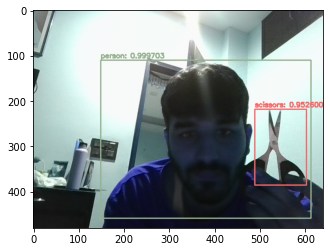

In [8]:
import matplotlib.pyplot as plt
plt.imshow(frame)

In [9]:
idxs.flatten()

array([ 2, 10])

In [10]:
print(classids)

[0, 0, 0, 0, 0, 0, 76, 76, 76, 76, 76]


In [11]:
print(classids[idxs[0]])

0


In [12]:
print(labels[classids[idxs[0]]])

person


In [13]:
print(len(idxs))

2


In [14]:
print(confidences)

[0.7712050080299377, 0.9786863923072815, 0.9997026324272156, 0.9974179863929749, 0.9797795414924622, 0.9620240330696106, 0.7164382934570312, 0.7141560316085815, 0.6464666128158569, 0.9261180758476257, 0.9525996446609497]


In [ ]:
labels[classids[idxs[i]]] in ['car','motorbike','aeroplane','bus','train','truck','knife','bicycle','scissors']: